In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [354]:
data = pd.read_csv('project_4_data.csv')
data

,flight_id,arrival_airport,model,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons
0,136119,SVO,Boeing 737-300,101.0,113.0,1653000.0,16141,2600,795,0.000234
1,136120,SVO,Boeing 737-300,99.0,109.0,1605400.0,16141,2600,795,0.000234
2,136122,SVO,Boeing 737-300,100.0,97.0,1431000.0,16141,2600,795,0.000234
3,136130,SVO,Boeing 737-300,99.0,107.0,1556600.0,16141,2600,795,0.000234
4,136131,SVO,Boeing 737-300,99.0,124.0,1812800.0,16141,2600,795,0.000234
...,...,...,...,...,...,...,...,...,...,...
122,136936,EGO,Sukhoi Superjet-100,50.0,82.0,632400.0,12328,1700,830,0.000192
123,136937,EGO,Sukhoi Superjet-100,50.0,81.0,626100.0,12328,1700,830,0.000192
124,136951,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,12328,1700,830,0.000192
125,136953,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,12328,1700,830,0.000192


# Описание датасета:
- flight_id - индивидуальный номер полёта
- arrival_airport - аэропорт прибытия
- model - Модель самолёта
- time_of_flying - время полёта
- pass_count - количество пассажиров
- ticket_rev - стоимость билетов (по сути, прибыль)
- max_fuel_mass - максимальная масса топлива, которую можно загрузить в самолёт
- fuel_cons - расход топлива в круиз-режиме (кг/ч)
- avg_speed - средняя скорость в круиз-режиме
- specific_fuel_cons - удельный расход топлива. Рассчитывается как расход топлива/(средняя круизная скорость*максимальная масса груза на борту)
Максимальная масса груза на борту рассчитывается следующим образом:

макс_м = (Средний вес пассажира (86 кг) * его багаж (18))*количество пассажиров + количество персонала(6) * их средняя масса (77)

Итого получаем, что для Boeing 737-300 	 это 13 982 кг,
а для Sukhoi Superjet-100 - 10 654 кг.

(Данные взяты с сайтов: https://www.superjetinternational.com/wp-content/uploads/SSJ100_Datasheet.pdf,
http://www.boeing.com/assets/pdf/commercial/airports/acaps/737.pdf)

In [355]:
data.describe()

,flight_id,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons
count,127.000000,127.000000,118.000000,1.180000e+02,127.000000,127.000000,127.000000,127.000000
mean,136533.574803,91.377953,101.652542,1.176506e+06,14369.606299,2181.889764,811.259843,0.000214
std,252.498327,64.377474,14.295643,4.794251e+05,1909.238285,450.646330,17.525135,0.000021
min,136119.000000,49.000000,64.000000,5.310000e+05,12328.000000,1700.000000,795.000000,0.000192
25%,136313.000000,50.000000,95.000000,7.464000e+05,12328.000000,1700.000000,795.000000,0.000192
50%,136540.000000,99.000000,97.000000,1.081650e+06,16141.000000,2600.000000,795.000000,0.000234
75%,136757.500000,100.000000,111.750000,1.625850e+06,16141.000000,2600.000000,830.000000,0.000234
max,136956.000000,312.000000,130.000000,1.886000e+06,16141.000000,2600.000000,830.000000,0.000234


In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   flight_id           127 non-null    int64  
 1   arrival_airport     127 non-null    object 
 2   model               127 non-null    object 
 3   time_of_flying      127 non-null    float64
 4   pass_count          118 non-null    float64
 5   ticket_rev          118 non-null    float64
 6   max_fuel_mass       127 non-null    int64  
 7   fuel_cons           127 non-null    int64  
 8   avg_speed           127 non-null    int64  
 9   specific_fuel_cons  127 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 10.0+ KB


In [357]:
print(data.isnull().sum())
data[data.arrival_airport == 'NOZ']

flight_id             0
arrival_airport       0
model                 0
time_of_flying        0
pass_count            9
ticket_rev            9
max_fuel_mass         0
fuel_cons             0
avg_speed             0
specific_fuel_cons    0
dtype: int64


,flight_id,arrival_airport,model,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons
59,136511,NOZ,Boeing 737-300,310.0,NaN,NaN,16141,2600,795,0.000234
60,136513,NOZ,Boeing 737-300,310.0,NaN,NaN,16141,2600,795,0.000234
61,136514,NOZ,Boeing 737-300,299.0,NaN,NaN,16141,2600,795,0.000234
62,136523,NOZ,Boeing 737-300,312.0,NaN,NaN,16141,2600,795,0.000234
63,136540,NOZ,Boeing 737-300,307.0,NaN,NaN,16141,2600,795,0.000234
64,136544,NOZ,Boeing 737-300,304.0,NaN,NaN,16141,2600,795,0.000234
65,136546,NOZ,Boeing 737-300,302.0,NaN,NaN,16141,2600,795,0.000234
66,136560,NOZ,Boeing 737-300,305.0,NaN,NaN,16141,2600,795,0.000234
67,136567,NOZ,Boeing 737-300,311.0,NaN,NaN,16141,2600,795,0.000234


В данном датасете присутствуют рейсы без пассажиров. У авиакомпании на них свои причины, но нам для рассчётов они не понадобятся, поэтому уберём их.

In [358]:
data = data.dropna(); data = data.reset_index()
del data['index']
data

,flight_id,arrival_airport,model,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons
0,136119,SVO,Boeing 737-300,101.0,113.0,1653000.0,16141,2600,795,0.000234
1,136120,SVO,Boeing 737-300,99.0,109.0,1605400.0,16141,2600,795,0.000234
2,136122,SVO,Boeing 737-300,100.0,97.0,1431000.0,16141,2600,795,0.000234
3,136130,SVO,Boeing 737-300,99.0,107.0,1556600.0,16141,2600,795,0.000234
4,136131,SVO,Boeing 737-300,99.0,124.0,1812800.0,16141,2600,795,0.000234
...,...,...,...,...,...,...,...,...,...,...
113,136936,EGO,Sukhoi Superjet-100,50.0,82.0,632400.0,12328,1700,830,0.000192
114,136937,EGO,Sukhoi Superjet-100,50.0,81.0,626100.0,12328,1700,830,0.000192
115,136951,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,12328,1700,830,0.000192
116,136953,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,12328,1700,830,0.000192


# Расстояние
У нас только три аэропорта - NOZ, SVO, EGO - один из которых мы убрали, так что этот параметр проще посчитать вручную:  
AAQ - SVO - 1 220 km (https://ru.distance.to/AAQ/SVO) - берём с этого сайта, потому что самолёт 
летит по заранее проложенному маршруту, и он может отличаться от того результата, если мы просто посчитаем  расстояние по координатам.  
AAQ - EGO - 553 km (https://ru.distance.to/AAQ/EGO).  
Теперь добавим это расстояние к таблице:

In [359]:
data['distance'] = data.arrival_airport.apply(lambda x: 1220 if x=='SVO' else 553)
data

,flight_id,arrival_airport,model,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons,distance
0,136119,SVO,Boeing 737-300,101.0,113.0,1653000.0,16141,2600,795,0.000234,1220
1,136120,SVO,Boeing 737-300,99.0,109.0,1605400.0,16141,2600,795,0.000234,1220
2,136122,SVO,Boeing 737-300,100.0,97.0,1431000.0,16141,2600,795,0.000234,1220
3,136130,SVO,Boeing 737-300,99.0,107.0,1556600.0,16141,2600,795,0.000234,1220
4,136131,SVO,Boeing 737-300,99.0,124.0,1812800.0,16141,2600,795,0.000234,1220
...,...,...,...,...,...,...,...,...,...,...,...
113,136936,EGO,Sukhoi Superjet-100,50.0,82.0,632400.0,12328,1700,830,0.000192,553
114,136937,EGO,Sukhoi Superjet-100,50.0,81.0,626100.0,12328,1700,830,0.000192,553
115,136951,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,12328,1700,830,0.000192,553
116,136953,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,12328,1700,830,0.000192,553


# Количество топлива
Рассчитаем количество топлива, необходимого для полёта.  
Для этого используем следующую формулу: 

У самолёта несколько статей расхода топливо (взято с сайта https://ato.soyuz.aero/?mode=cont&id=38):
> - Taxi fuel - расход топлива на работу двигателей при выполнении наземных операций
>- APU fuel - расход топлива на работу вспомогательной силовой установки (APU)
- Trip fuel - расход топлива на полет по маршруту, включая взлет, набор высоты, полет на эшелоне, снижение и выполнение схемы захода на посадку на аэродроме назначения
- Enroute reserve или Contingency fuel - дополнительный резерв топлива на непредвиденные обстоятельства на маршруте, как правило, 5% от Trip fuel
- Alternate fuel - расход топлива для ухода на запасной аэродром, включая уход на второй круг с высоты принятия решения (missed approach), набор высоты, полет на эшелоне, снижение и посадку на запасном аэродроме. Если планом полета предусмотрено несколько запасных аэродромов, то резерв топлива должен обеспечивать полет к наиболее удаленному из них
- Holding fuel - расход топлива на полет в течении 30 минут в зоне ожидания у запасного аэродрома на высоте 1500 футов над уровнем ВПП. Если планом полета запасной аэродром не предусмотрен, то запас топлива должен обеспечивать полет в зоне ожидания в течении 60 минут над аэродромом назначения

Масса необходимого топлива для основной части (mass_fuel_cruis) = Расход топлива * время полёта + удельный расход топлива * расстояние * масса пассажиров (рассчитывается по формуле, указанной в начале)

По указанным данным для полёта, на основную часть идёт только 60% топлива, то есть чтобы получить всю массу топлива, которая понадобится в полёте, нужно разделить на 0,6.

In [360]:
#Рассчитаем количество топлива, необходимого для полёта.
data['fuel'] = (data.fuel_cons*data.time_of_flying/60 + 
                data.specific_fuel_cons*data.distance*(104*data.pass_count+462))/.6
data

,flight_id,arrival_airport,model,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons,distance,fuel
0,136119,SVO,Boeing 737-300,101.0,113.0,1653000.0,16141,2600,795,0.000234,1220,13105.865644
1,136120,SVO,Boeing 737-300,99.0,109.0,1605400.0,16141,2600,795,0.000234,1220,12763.488400
2,136122,SVO,Boeing 737-300,100.0,97.0,1431000.0,16141,2600,795,0.000234,1220,12241.912222
3,136130,SVO,Boeing 737-300,99.0,107.0,1556600.0,16141,2600,795,0.000234,1220,12664.522000
4,136131,SVO,Boeing 737-300,99.0,124.0,1812800.0,16141,2600,795,0.000234,1220,13505.736400
...,...,...,...,...,...,...,...,...,...,...,...,...
113,136936,EGO,Sukhoi Superjet-100,50.0,82.0,632400.0,12328,1700,830,0.000192,553,3951.981511
114,136937,EGO,Sukhoi Superjet-100,50.0,81.0,626100.0,12328,1700,830,0.000192,553,3933.577671
115,136951,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,12328,1700,830,0.000192,553,4051.990009
116,136953,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,12328,1700,830,0.000192,553,4228.039111


# Убытки
Теперь будем считать убытки.  
В них входят следующие пункты:
- Обслуживание и лизинг
- Зарплаты персонала
- Еда на борту
- Топливо

# 1. Обслуживание

По различным источникам, найденным мной в интернете, в общей сумме обслуживание самолёта (аэронавигация, осмотры, трапы ко входу для пассажиров и тд) и лизинг обходятся приблизительно в 40% от всего дохода за полёт. Добавим этот параметр (maintenance), считая от максимально возможного для каждого самолёта:

In [361]:

b_main = data[data.model=='Boeing 737-300'].ticket_rev.max()*0.4 
s_main = data[data.model=='Sukhoi Superjet-100'].ticket_rev.max()*0.4 
b_main = data.ticket_rev.max()*0.4 
data['maintenance'] = data.model.apply(lambda x: b_main if x=='Boeing 737-300' else s_main)
data

,flight_id,arrival_airport,model,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons,distance,fuel,maintenance
0,136119,SVO,Boeing 737-300,101.0,113.0,1653000.0,16141,2600,795,0.000234,1220,13105.865644,754400.0
1,136120,SVO,Boeing 737-300,99.0,109.0,1605400.0,16141,2600,795,0.000234,1220,12763.488400,754400.0
2,136122,SVO,Boeing 737-300,100.0,97.0,1431000.0,16141,2600,795,0.000234,1220,12241.912222,754400.0
3,136130,SVO,Boeing 737-300,99.0,107.0,1556600.0,16141,2600,795,0.000234,1220,12664.522000,754400.0
4,136131,SVO,Boeing 737-300,99.0,124.0,1812800.0,16141,2600,795,0.000234,1220,13505.736400,754400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,136936,EGO,Sukhoi Superjet-100,50.0,82.0,632400.0,12328,1700,830,0.000192,553,3951.981511,306120.0
114,136937,EGO,Sukhoi Superjet-100,50.0,81.0,626100.0,12328,1700,830,0.000192,553,3933.577671,306120.0
115,136951,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,12328,1700,830,0.000192,553,4051.990009,306120.0
116,136953,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,12328,1700,830,0.000192,553,4228.039111,306120.0


# 2. Зарплаты персонала
Средняя зарплата бортпроводника 80 тыс.руб., командира 400 тыс.руб., второго пилота 250 тыс.руб., бортинженера 250 тыс.руб. На борту, как правило, находятся 5 бортпроводников, и по одному из остальных вышеперечисленных. Таким образом получаем:  
90 * 5+400+250+250=1 300 тыс.руб./месяц  
Чтобы посчитать, сколько выйдет за каждый полёт, нужно умножить на три месяца (т.к. данные используются только за три) и разделить на количество полётов. Количество полётов 127, а не 118, т.к. на рейсах без пассажиров всё равно есть персонал.  
1300 * 3/127 = 31 тыс.руб/полёт

# 3. Еда на борту
Как правило, еда на борт заказывается на все места, которые есть в самолёте + персонал.  
У эконом-класса примерная цена обеда составляет 550 рублей, а у бизнесс-класса - 3000 рублей, который занимает 15% от всех мест в салоне самолёта.  
Таким образом получаем для Boeing 737-300:  
138 * 550 * 0,85 + 138 * 3000 * 0,15 = 126 000 (руб/полёт)   
И для Sukhoi Superjet-100:  
116 * 550 * 0,85 + 116 * 3000 * 0,15 = 106 000 (руб/полёт)   

In [362]:
data['food_cost'] = data.model.apply(lambda x: 126000 if x=='Boeing 737-300' else 106000)
data

,flight_id,arrival_airport,model,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons,distance,fuel,maintenance,food_cost
0,136119,SVO,Boeing 737-300,101.0,113.0,1653000.0,16141,2600,795,0.000234,1220,13105.865644,754400.0,126000
1,136120,SVO,Boeing 737-300,99.0,109.0,1605400.0,16141,2600,795,0.000234,1220,12763.488400,754400.0,126000
2,136122,SVO,Boeing 737-300,100.0,97.0,1431000.0,16141,2600,795,0.000234,1220,12241.912222,754400.0,126000
3,136130,SVO,Boeing 737-300,99.0,107.0,1556600.0,16141,2600,795,0.000234,1220,12664.522000,754400.0,126000
4,136131,SVO,Boeing 737-300,99.0,124.0,1812800.0,16141,2600,795,0.000234,1220,13505.736400,754400.0,126000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,136936,EGO,Sukhoi Superjet-100,50.0,82.0,632400.0,12328,1700,830,0.000192,553,3951.981511,306120.0,106000
114,136937,EGO,Sukhoi Superjet-100,50.0,81.0,626100.0,12328,1700,830,0.000192,553,3933.577671,306120.0,106000
115,136951,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,12328,1700,830,0.000192,553,4051.990009,306120.0,106000
116,136953,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,12328,1700,830,0.000192,553,4228.039111,306120.0,106000


# 4. Стоимость топлива
В среднем за 2017 год стоимость топлива с учётом НДС и заправки была равна 44 800 руб/т
Данные были взяты с сайта  www.bato.aero

In [363]:
data['fuel_cost'] = data.fuel * 44800 / 1000
data

,flight_id,arrival_airport,model,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons,distance,fuel,maintenance,food_cost,fuel_cost
0,136119,SVO,Boeing 737-300,101.0,113.0,1653000.0,16141,2600,795,0.000234,1220,13105.865644,754400.0,126000,587142.780871
1,136120,SVO,Boeing 737-300,99.0,109.0,1605400.0,16141,2600,795,0.000234,1220,12763.488400,754400.0,126000,571804.280320
2,136122,SVO,Boeing 737-300,100.0,97.0,1431000.0,16141,2600,795,0.000234,1220,12241.912222,754400.0,126000,548437.667556
3,136130,SVO,Boeing 737-300,99.0,107.0,1556600.0,16141,2600,795,0.000234,1220,12664.522000,754400.0,126000,567370.585600
4,136131,SVO,Boeing 737-300,99.0,124.0,1812800.0,16141,2600,795,0.000234,1220,13505.736400,754400.0,126000,605056.990720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,136936,EGO,Sukhoi Superjet-100,50.0,82.0,632400.0,12328,1700,830,0.000192,553,3951.981511,306120.0,106000,177048.771698
114,136937,EGO,Sukhoi Superjet-100,50.0,81.0,626100.0,12328,1700,830,0.000192,553,3933.577671,306120.0,106000,176224.279666
115,136951,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,12328,1700,830,0.000192,553,4051.990009,306120.0,106000,181529.152398
116,136953,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,12328,1700,830,0.000192,553,4228.039111,306120.0,106000,189416.152178


# Общие траты

In [364]:
data['loss'] = data.maintenance + data.food_cost + data.fuel_cost+31000
data

,flight_id,arrival_airport,model,time_of_flying,pass_count,ticket_rev,max_fuel_mass,fuel_cons,avg_speed,specific_fuel_cons,distance,fuel,maintenance,food_cost,fuel_cost,loss
0,136119,SVO,Boeing 737-300,101.0,113.0,1653000.0,16141,2600,795,0.000234,1220,13105.865644,754400.0,126000,587142.780871,1.498543e+06
1,136120,SVO,Boeing 737-300,99.0,109.0,1605400.0,16141,2600,795,0.000234,1220,12763.488400,754400.0,126000,571804.280320,1.483204e+06
2,136122,SVO,Boeing 737-300,100.0,97.0,1431000.0,16141,2600,795,0.000234,1220,12241.912222,754400.0,126000,548437.667556,1.459838e+06
3,136130,SVO,Boeing 737-300,99.0,107.0,1556600.0,16141,2600,795,0.000234,1220,12664.522000,754400.0,126000,567370.585600,1.478771e+06
4,136131,SVO,Boeing 737-300,99.0,124.0,1812800.0,16141,2600,795,0.000234,1220,13505.736400,754400.0,126000,605056.990720,1.516457e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,136936,EGO,Sukhoi Superjet-100,50.0,82.0,632400.0,12328,1700,830,0.000192,553,3951.981511,306120.0,106000,177048.771698,6.201688e+05
114,136937,EGO,Sukhoi Superjet-100,50.0,81.0,626100.0,12328,1700,830,0.000192,553,3933.577671,306120.0,106000,176224.279666,6.193443e+05
115,136951,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,12328,1700,830,0.000192,553,4051.990009,306120.0,106000,181529.152398,6.246492e+05
116,136953,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,12328,1700,830,0.000192,553,4228.039111,306120.0,106000,189416.152178,6.325362e+05


# Прибыль

In [365]:
cols = ['flight_id', 'model', 'ticket_rev', 'loss']
df = data[cols].copy()
df['profit'] = df.ticket_rev - df.loss # Прибыль от рейса.
df

,flight_id,model,ticket_rev,loss,profit
0,136119,Boeing 737-300,1653000.0,1.498543e+06,154457.219129
1,136120,Boeing 737-300,1605400.0,1.483204e+06,122195.719680
2,136122,Boeing 737-300,1431000.0,1.459838e+06,-28837.667556
3,136130,Boeing 737-300,1556600.0,1.478771e+06,77829.414400
4,136131,Boeing 737-300,1812800.0,1.516457e+06,296343.009280
...,...,...,...,...,...
113,136936,Sukhoi Superjet-100,632400.0,6.201688e+05,12231.228302
114,136937,Sukhoi Superjet-100,626100.0,6.193443e+05,6755.720334
115,136951,Sukhoi Superjet-100,720600.0,6.246492e+05,95950.847602
116,136953,Sukhoi Superjet-100,765300.0,6.325362e+05,132763.847822


In [698]:
df.describe()

,flight_id,ticket_rev,loss,profit
count,118.000000,1.180000e+02,1.180000e+02,118.000000
mean,136533.440678,1.176506e+06,1.061060e+06,115446.155687
std,261.971994,4.794251e+05,4.360471e+05,95851.909818
min,136119.000000,5.310000e+05,6.032124e+05,-77625.883250
25%,136286.250000,7.464000e+05,6.304206e+05,55567.443733
50%,136528.500000,1.081650e+06,1.047245e+06,120755.054108
75%,136768.500000,1.625850e+06,1.492791e+06,139441.369564
max,136956.000000,1.886000e+06,1.532994e+06,353006.369564


# Графики

In [160]:
print(f'Среднее по тратам за обслуживание: {int(data.maintenance.mean() )} руб.')
print(f'Среднее по тратам за еду: {int(data.food_cost.mean() )} руб.')
print(f'Среднее по тратам за топливо: {int(data.fuel_cost.mean() )} руб.')
print('Среднее по тратам за оплату труда персонала : 31000 руб.')
print(f'Среднее по тратам: {int(data.loss.mean() )} руб.')
print(f'Средний доход по билетам: {int(data.ticket_rev.mean() )} руб.')

Среднее по тратам за обслуживание: 530260 руб.
Среднее по тратам за еду: 116000 руб.
Среднее по тратам за топливо: 383799 руб.
Среднее по тратам за оплату труда персонала : 31000 руб.
Среднее по тратам: 1061059 руб.
Средний доход по билетам: 1176505 руб.


Тогда получим, что за обслуживание выходит:  
Стоимость топлива: 36, ЗП персонала: 3, Обслуживание самолёта: 50, Еда: 11

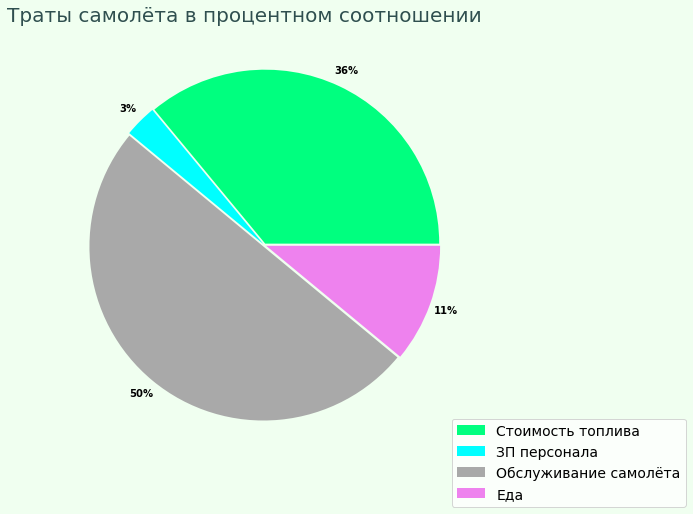

In [142]:
dct = {'Стоимость топлива': 36, 'ЗП персонала': 3, 'Обслуживание самолёта': 50, 'Еда': 11}
struct = pd.Series(dct)
fig, ax = plt.subplots(figsize=(8,8), facecolor='honeydew')
wedges, texts, autotexts = ax.pie(x=struct, autopct="%.f%%", pctdistance=1.1, explode = [0.01]*4,
                                  colors = ('springgreen', 'aqua','darkgrey','violet'));

ax.legend(wedges, dct.keys(),  loc="center", bbox_to_anchor=(0.7, -0.5, 1, 1),
                                                                  fontsize=14),
plt.setp(autotexts, size=10, weight="bold")
ax.set_title(
    'Траты самолёта в процентном соотношении',
    fontsize=20, loc="right", color = 'darkslategrey');

# Траты относительно дохода

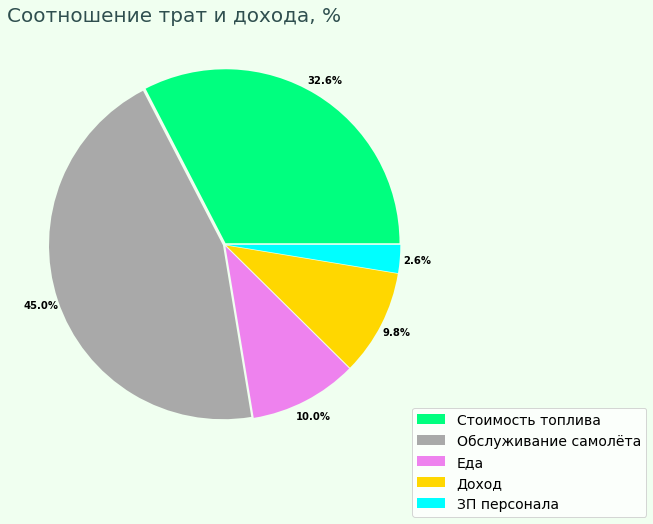

In [382]:
dct = {'Стоимость топлива': 32.6, 'Обслуживание самолёта': 45, 'Еда': 10, 'Доход': 9.8, 'ЗП персонала': 2.6}
struct = pd.Series(dct)
fig, ax = plt.subplots(figsize=(8,8), facecolor='honeydew')
wedges, texts, autotexts = ax.pie(x=struct, autopct="%.1f%%", pctdistance=1.1, explode = [0.01]*5,
                                  colors = ('springgreen','darkgrey','violet', 'gold', 'aqua'));

ax.legend(wedges, dct.keys(),  loc="center", bbox_to_anchor=(0.7, -0.5, 1, 1),
                                                                  fontsize=14),
plt.setp(autotexts, size=10, weight="bold")
ax.set_title(
    'Соотношение трат и дохода, %',
    fontsize=20, loc="left", color = 'darkslategrey');

Text(0, 0.5, 'Прибыль, тыс.руб')

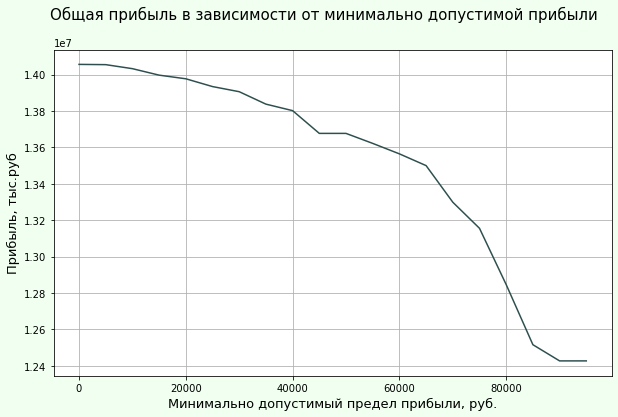

In [369]:
df1 = []
for a in range(0,100000,5000):
    df1.append([df[df.profit>=a].profit.sum(),a])

df2 = pd.DataFrame(df1, columns=['profit', 'limit'])

figsize = (10,6)

fig = plt.figure(figsize=figsize, facecolor='honeydew', frameon=True)
plt.plot(df2.limit, df2.profit,'darkslategrey')
plt.grid(True)
plt.suptitle('Общая прибыль в зависимости от минимально допустимой прибыли', fontsize=15)
plt.xlabel('Минимально допустимый предел прибыли, руб.', fontsize=13)
plt.ylabel('Прибыль, тыс.руб', fontsize=13)

In [501]:
df3 = []
for a in range(118):
    df3.append([df.flight_id[a], df.profit[a],
                df.profit[a]/round(df.profit.sum(),0)*100])
df4 = pd.DataFrame(df3, columns=['flight_id' ,'profit', 'perc'])
df4 = df4.sort_values(by = 'perc', ascending=False)
df5 = [i for i in range(1,119)]
df4['counting'] = df5
df4

,flight_id,profit,perc,counting
19,136226,353006.369564,2.591320,1
32,136316,353006.369564,2.591320,2
42,136389,343023.216924,2.518037,3
43,136403,343023.216924,2.518037,4
46,136423,318623.216924,2.338923,5
...,...,...,...,...
100,136844,-42595.295602,-0.312680,114
21,136250,-59706.917831,-0.438292,115
54,136464,-68488.209636,-0.502753,116
68,136642,-72212.359566,-0.530091,117


Text(0, 0.5, 'Процент от общей прибыли, %')

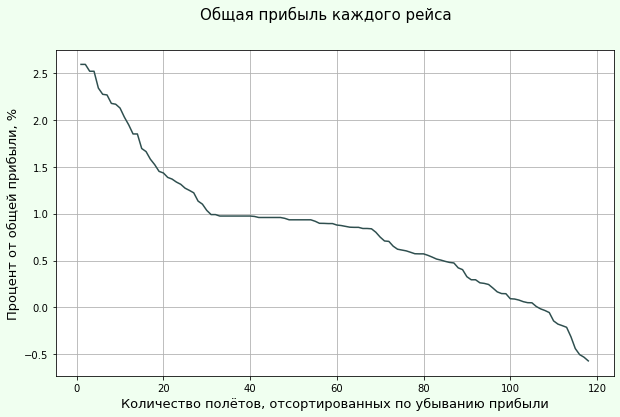

In [502]:
figsize = (10,6)

fig = plt.figure(figsize=figsize, facecolor='honeydew', frameon=True)
plt.plot(df4.counting, df4.perc,'darkslategrey')
plt.grid(True)
plt.suptitle('Общая прибыль каждого рейса', fontsize=15)
plt.xlabel('Количество полётов, отсортированных по убыванию прибыли', fontsize=13)
plt.ylabel('Процент от общей прибыли, %', fontsize=13)

In [680]:
df3 = []
for a in range(118):
    df3.append([df.flight_id[a], df.profit[a],
                df.profit[a]/round(df.profit.sum(),0)*100])
df4 = pd.DataFrame(df3, columns=['flight_id' ,'profit', 'perc'])
df4 = df4.sort_values(by = 'profit')
df4['counting'] = [i for i in range(1,119)]
df4

,flight_id,profit,perc,counting
93,136807,-77625.883250,-0.569830,1
68,136642,-72212.359566,-0.530091,2
54,136464,-68488.209636,-0.502753,3
21,136250,-59706.917831,-0.438292,4
100,136844,-42595.295602,-0.312680,5
...,...,...,...,...
46,136423,318623.216924,2.338923,114
42,136389,343023.216924,2.518037,115
43,136403,343023.216924,2.518037,116
32,136316,353006.369564,2.591320,117


In [687]:
df5 = []
c = 0
for a in range (118):
    c += df4[df4.counting==a+1].profit.iloc[0]
    df5.append([c, c/round(df.profit.sum(),0)*100])
df5 = pd.DataFrame(df5, columns=['summ' ,'perc_summ'])
df6 = pd.concat([df4,df5],axis=1)
df6['counting'] = [i for i in range(1,119)]
df6

,flight_id,profit,perc,counting,summ,perc_summ
0,136119,154457.219129,1.133827,1,-7.762588e+04,-0.569830
1,136120,122195.719680,0.897004,2,-1.498382e+05,-1.099920
2,136122,-28837.667556,-0.211689,3,-2.183265e+05,-1.602673
3,136130,77829.414400,0.571324,4,-2.780334e+05,-2.040965
4,136131,296343.009280,2.175370,5,-3.206287e+05,-2.353645
...,...,...,...,...,...,...
113,136936,12231.228302,0.089786,114,1.223059e+07,89.781289
114,136937,6755.720334,0.049592,115,1.257361e+07,92.299326
115,136951,95950.847602,0.704348,116,1.291663e+07,94.817362
116,136953,132763.847822,0.974582,117,1.326964e+07,97.408683


Text(0, 0.5, 'Процент общей прибыли, %')

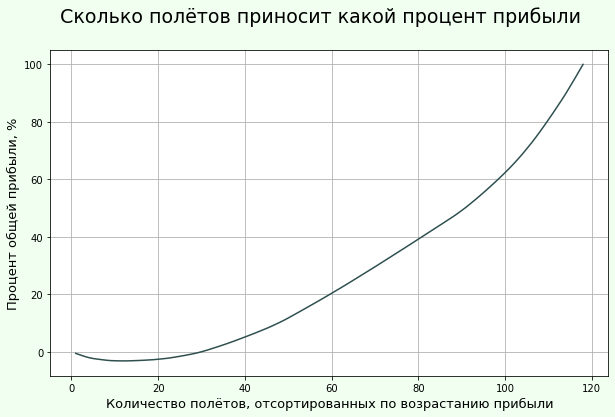

In [682]:
figsize = (10,6)

fig = plt.figure(figsize=figsize, facecolor='honeydew', frameon=True)
plt.plot(df6.counting, df6.perc_summ,'darkslategrey')
plt.grid(True)
plt.suptitle('Сколько полётов приносит какой процент прибыли', fontsize=19)
plt.xlabel('Количество полётов, отсортированных по возрастанию прибыли', fontsize=13)
plt.ylabel('Процент общей прибыли, %', fontsize=13)

# Какие рейсы считаем убыточными

In [718]:
print(f'Оптимальный предел минимальной допустимой прибыли: {int(df4[df4.counting == 31].profit.iloc[0] )} руб.')

Оптимальный предел минимальной допустимой прибыли: 57496 руб.


In [717]:
profit_sum_before = round(df.profit.sum(),0)
profit_sum_plus = round(df[df.profit>=0].profit.sum(),0)

print(f'Общая прибыль рейсов: {int(profit_sum_before)} руб.')
print(f'Прибыль при отмене рейсов: {int(profit_sum_plus-profit_sum_before)} руб.')
print(f'Прибыль при отмене рейсов в процентах: {round((profit_sum_plus-profit_sum_before)/profit_sum_plus*100,3)} %')
print(f'Количество убыточных рейсов: {int(df[df.profit<0].profit.count())} шт.')
print(f'Общая прибыль рейсов (без убыточных): {int(profit_sum_plus)} руб.')

Общая прибыль рейсов: 13622646 руб.
Прибыль при отмене рейсов: 433603 руб.
Прибыль при отмене рейсов в процентах: 3.085 %
Количество убыточных рейсов: 12 шт.
Общая прибыль рейсов (без убыточных): 14056249 руб.


In [710]:
print(f'Количество убыточных зимних рейсов - {df[df.profit<0].shape[0]} шт.')
print('\nЭто следующие рейсы:')
df[df.profit<0]

Количество убыточных зимних рейсов - 12 шт.

Это следующие рейсы:


,flight_id,model,ticket_rev,loss,profit
2,136122,Boeing 737-300,1431000.0,1.459838e+06,-28837.667556
12,136178,Boeing 737-300,1434600.0,1.461036e+06,-26435.806720
16,136204,Boeing 737-300,1457800.0,1.482006e+06,-24206.141156
21,136250,Boeing 737-300,1407800.0,1.467507e+06,-59706.917831
38,136360,Boeing 737-300,1455400.0,1.459838e+06,-4437.667556
54,136464,Boeing 737-300,1398000.0,1.466488e+06,-68488.209636
65,136620,Sukhoi Superjet-100,613500.0,6.155797e+05,-2079.740046
68,136642,Sukhoi Superjet-100,531000.0,6.032124e+05,-72212.359566
93,136807,Sukhoi Superjet-100,531000.0,6.086259e+05,-77625.883250
100,136844,Sukhoi Superjet-100,575100.0,6.176953e+05,-42595.295602


In [711]:
print(f'Количество зимних рейсов, при отмене которых прибыль не поменяется - {df[df.profit<57496].shape[0]} шт.')
print('\nЭто следующие рейсы:')
df[df.profit<57496]

Количество зимних рейсов, при отмене которых прибыль не поменяется - 30 шт.

Это следующие рейсы:


,flight_id,model,ticket_rev,loss,profit
2,136122,Boeing 737-300,1431000.0,1.459838e+06,-28837.667556
12,136178,Boeing 737-300,1434600.0,1.461036e+06,-26435.806720
14,136185,Boeing 737-300,1520000.0,1.485062e+06,34937.734258
15,136202,Boeing 737-300,1495600.0,1.472959e+06,22640.679253
16,136204,Boeing 737-300,1457800.0,1.482006e+06,-24206.141156
21,136250,Boeing 737-300,1407800.0,1.467507e+06,-59706.917831
28,136282,Boeing 737-300,1518800.0,1.483025e+06,35775.150649
35,136345,Boeing 737-300,1517600.0,1.484223e+06,33377.011484
38,136360,Boeing 737-300,1455400.0,1.459838e+06,-4437.667556
40,136383,Boeing 737-300,1493200.0,1.486260e+06,6939.595093
